In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
class LogisticRegression:
    def __init__(self, eta = 0.1, epochs = 10, random_state = 1):
        self.eta = eta
        self.random_state = random_state
        self.epochs = epochs
        self.rgen_ = np.random.RandomState(self.random_state)
    def fit(self, X, y):
        self.w_ = self.rgen_.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_  = 0.0
        self.losses_ = []
        for epoch in range(self.epochs):
            loss = 0
            z = self.net_input(X)
            sigma  = self.activation(z)
            error = (y - sigma)
            self.w_ += self.eta * X.T.dot(error)/ X.shape[0]
            self.b_ += self.eta * error.mean()
            loss = -y.T.dot(np.log(sigma)) - (1-y).T.dot(np.log(1-sigma))
            self.losses_.append(loss)  

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def activation(self, z):
        return 1/(1 + np.exp(-z))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)
    

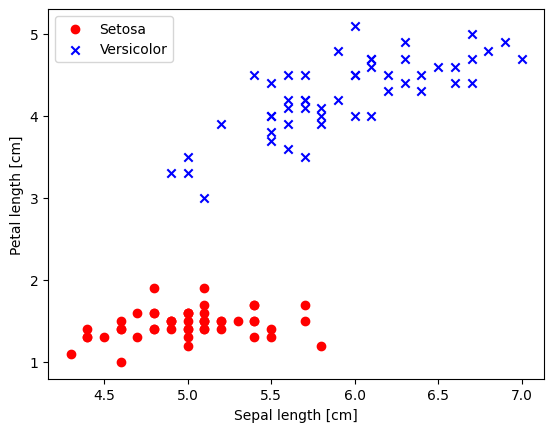

In [27]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", 0, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [28]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

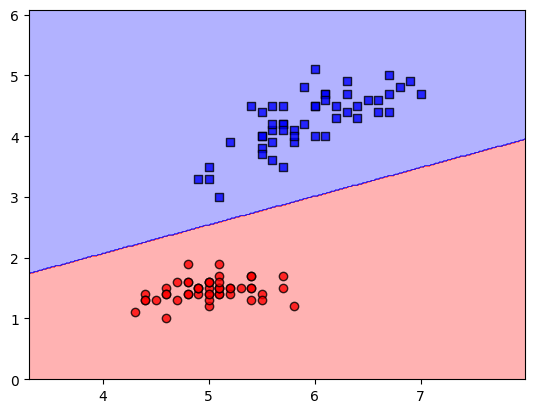

In [36]:
#taking an ideal learning rate
lg = LogisticRegression(eta=0.1, epochs=1000)
lg.fit(X,y)
plot_decision_regions(X, y, classifier=lg)


Text(0.5, 1.0, 'Adaline - Learning rate 0.1')

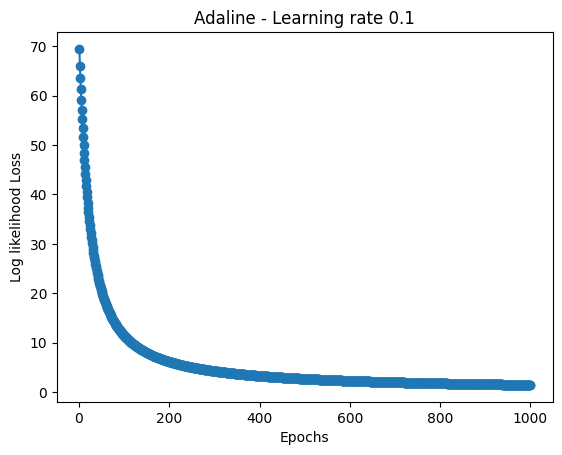

In [37]:
plt.plot(range(1, len(lg.losses_) + 1),
lg.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log likelihood Loss')
plt.title('Adaline - Learning rate 0.1')

In [33]:
# Standardize the inputs
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()


In [44]:
lgStd = LogisticRegression(eta=0.3, epochs=1000)
lgStd.fit(X_std,y)

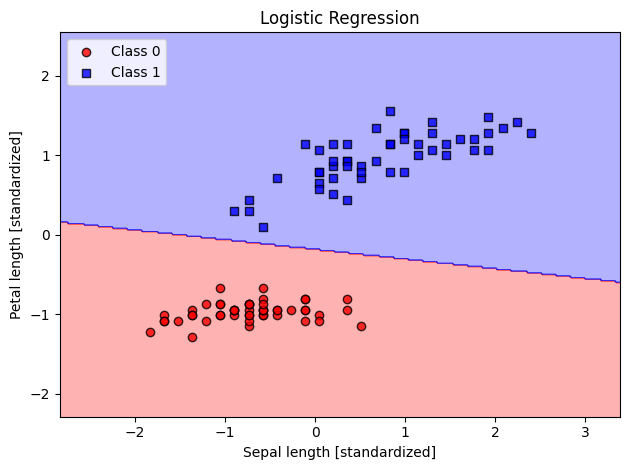

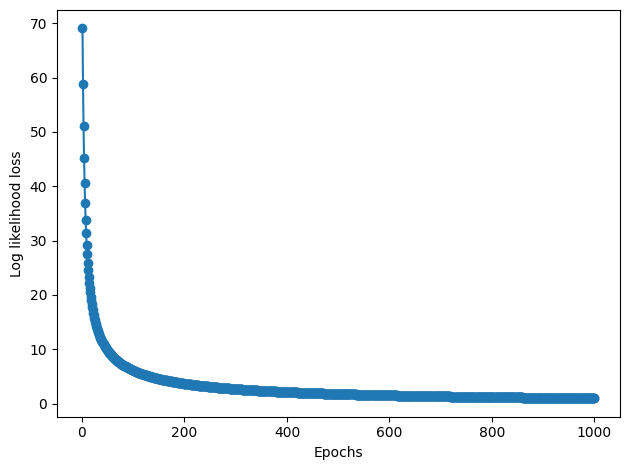

In [46]:
plot_decision_regions(X_std, y, classifier=lgStd)
plt.title('Logistic Regression')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(lgStd.losses_) + 1),lgStd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log likelihood loss')
plt.tight_layout()
plt.show()